#### Importing required libraries

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sammy123/lower-back-pain-symptoms-dataset")

print("Path to dataset files:", path)

100%|██████████| 19.8k/19.8k [00:00<00:00, 7.97MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sammy123/lower-back-pain-symptoms-dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading dataset

In [ ]:
df=pd.read_csv("/root/.cache/kagglehub/datasets/sammy123/lower-back-pain-symptoms-dataset/versions/1/Dataset_spine.csv")

In [ ]:
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

In [ ]:
# Dropping the last column
df.drop('Unnamed: 13',axis=1,inplace=True)

In [ ]:
# Mapping column names
df.rename(columns = {
    "Col1" : "pelvic_incidence",
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope",
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis",
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope",
    "Col10" :"cervical_tilt",
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope",
    "Class_att" : "outcome"}, inplace=True)

#### Analyzing the dataset

In [ ]:
# Displaying the no. of rows(samples) and columns(features) in the dataset
df.shape

(310, 13)

In [ ]:
# Getting to know the summary of dataset - data type of features , non-null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  outcome                   310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [ ]:
# Getting the no. of unique values for each feature
df.nunique()

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
pelvic_slope                310
direct_tilt                 310
thoracic_slope              310
cervical_tilt               310
sacrum_angle                310
scoliosis_slope             310
outcome                       2
dtype: int64

In [ ]:
# Checking the null values
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
outcome                     0
dtype: int64

#### EDA

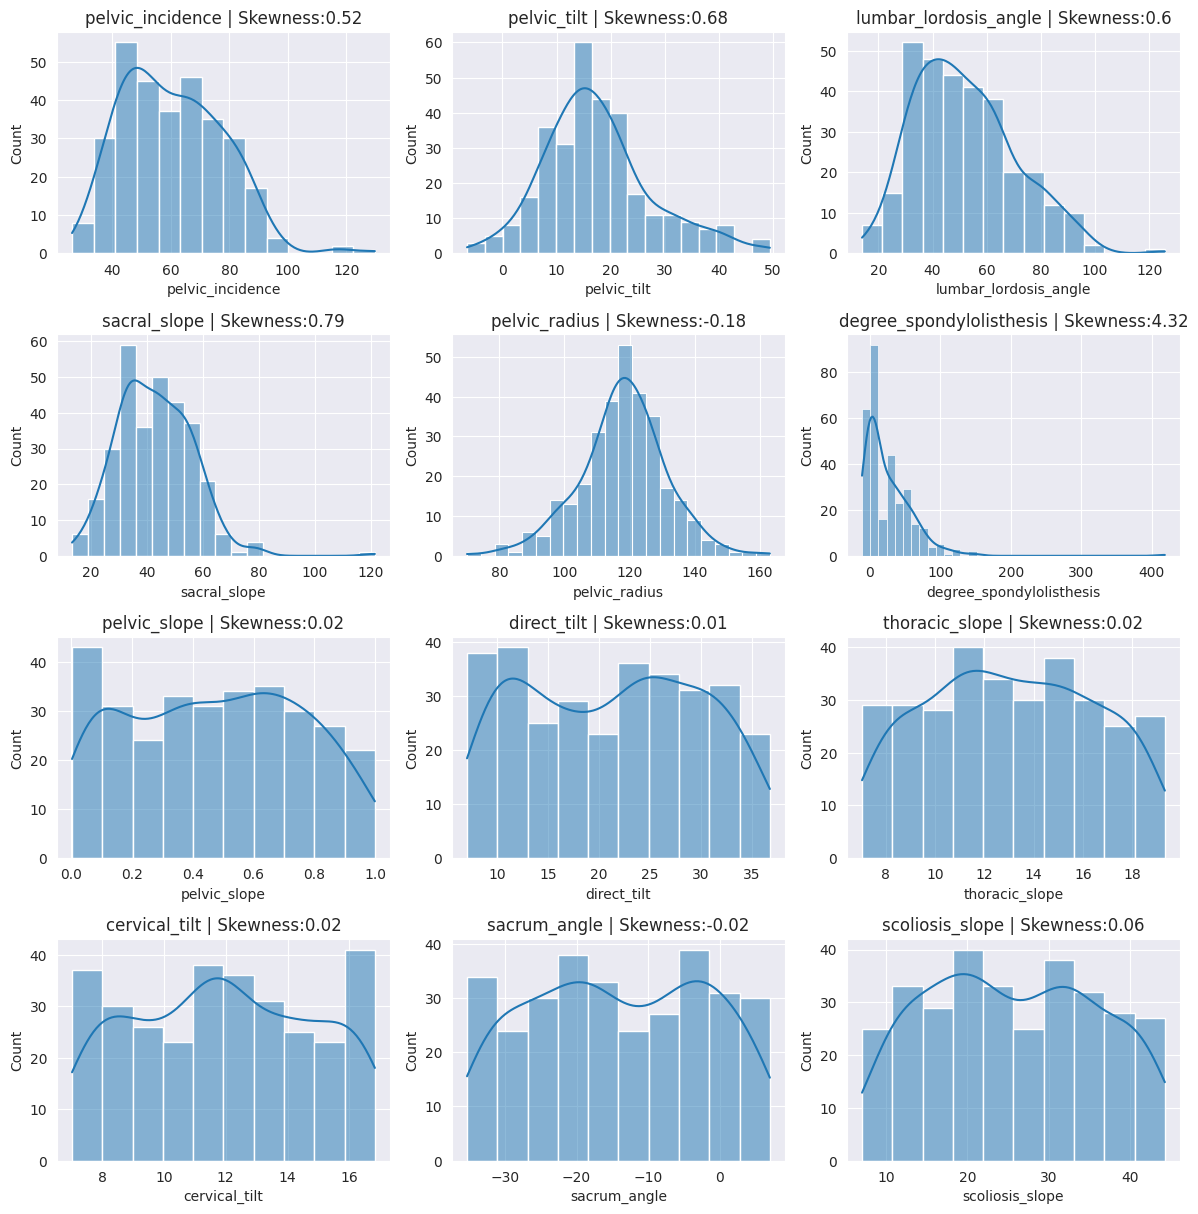

In [ ]:
# Set seaborn style
sns.set_style('darkgrid')

# Selecting numerical features for visualization
numerical_columns=df.select_dtypes(include=['float64']).columns

# Plotting distribution of each numerical feature
plt.figure(figsize=(12, len(numerical_columns)*3))
for idx,feature in enumerate(numerical_columns,1):
  plt.subplot(len(numerical_columns),3,idx)
  sns.histplot(df[feature],kde=True)
  plt.title(f"{feature} | Skewness:{round(df[feature].skew(),2)}")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
skewed_features=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis']
def power_transform(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    df[columns] = pt.fit_transform(df[columns])
    return df

# Apply Power Transformation
df = power_transform(df, skewed_features)

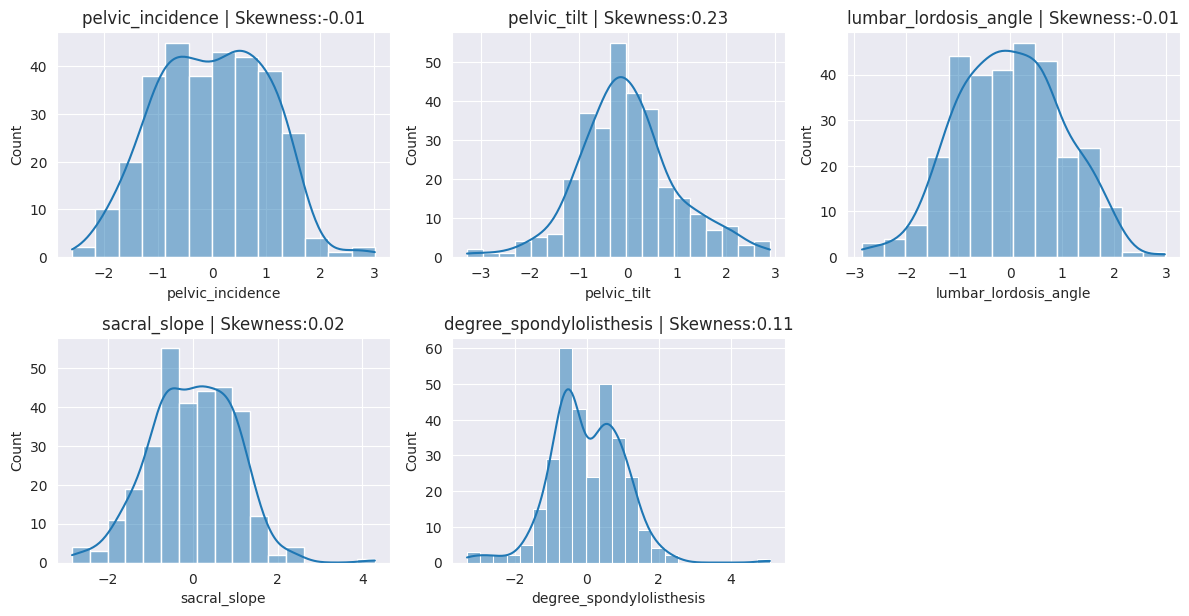

In [ ]:
# Set seaborn style
sns.set_style('darkgrid')


# Plotting distribution of each numerical feature
plt.figure(figsize=(12, len(skewed_features)*3))
for idx,feature in enumerate(skewed_features,1):
  plt.subplot(len(skewed_features),3,idx)
  sns.histplot(df[feature],kde=True)
  plt.title(f"{feature} | Skewness:{round(df[feature].skew(),2)}")

plt.tight_layout()
plt.show()

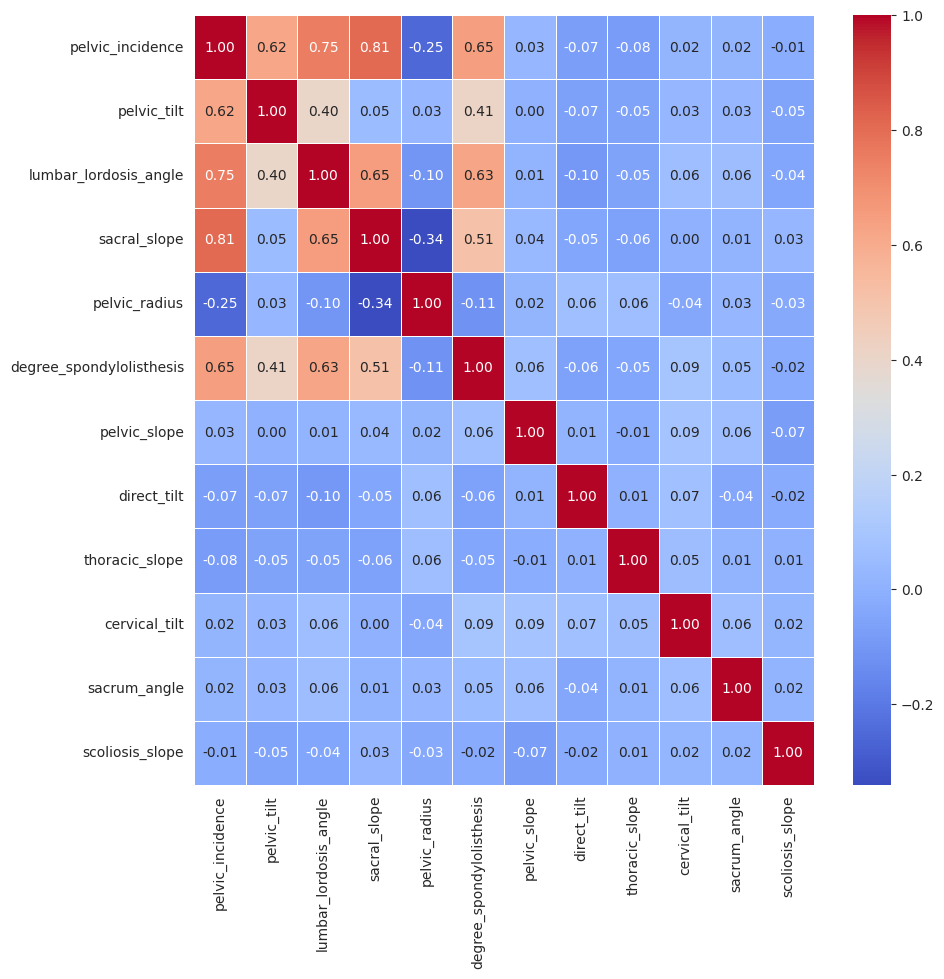

In [ ]:
# Analyzing the co-relation among features
numerical_data = df.select_dtypes(include=['float64'])
plt.figure(figsize=(10,10))
ax=sns.heatmap(numerical_data.corr(),annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

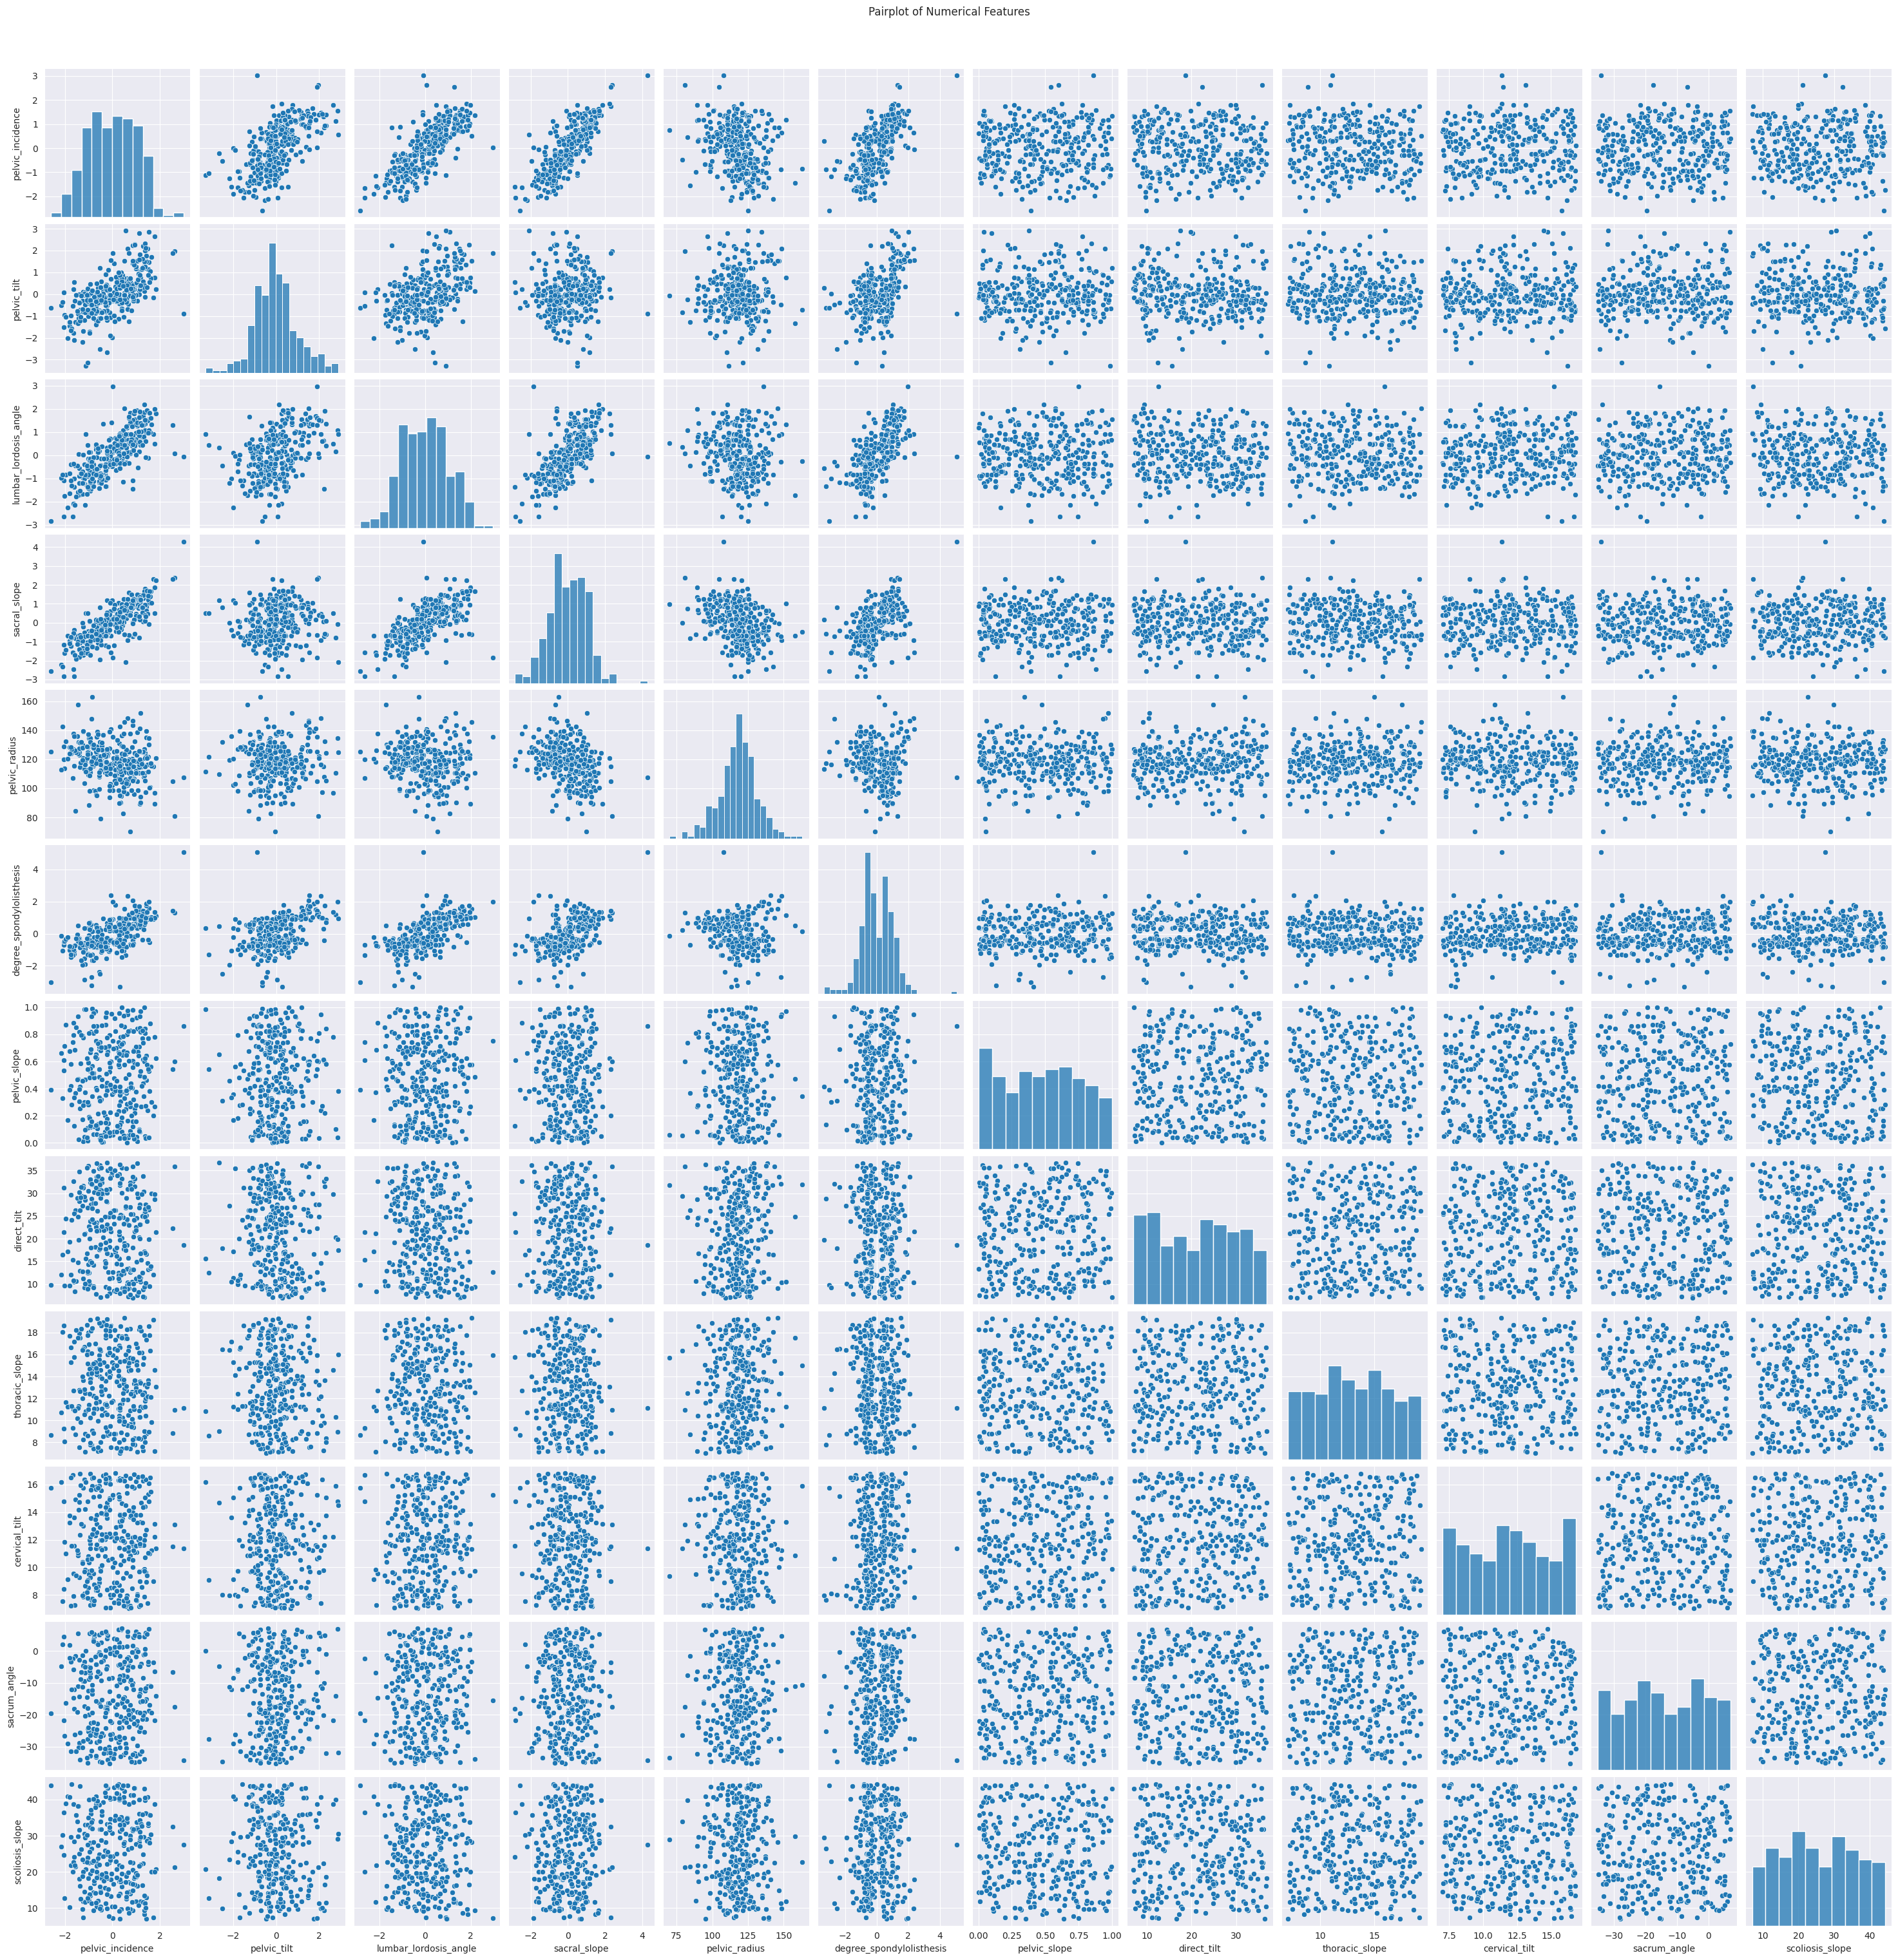

In [ ]:
# Pairplotting to Visualize Relationships Between Features
numerical_features = df.select_dtypes(include=['float64']).columns
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

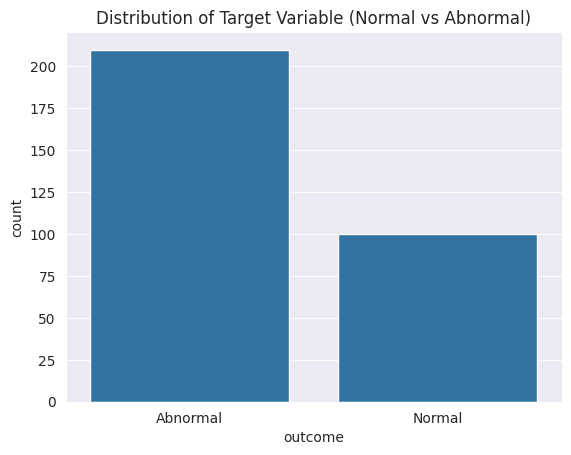

In [ ]:
# Visualize Distribution of Target Variable
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Target Variable (Normal vs Abnormal)')
plt.show()

#### Splitting  into training and testing dataset

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns='outcome')
y = df['outcome']
y = [0 if label == 'Abnormal' else 1 for label in y]
print(np.bincount(y))

[210 100]


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the model

#### T-SNE Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


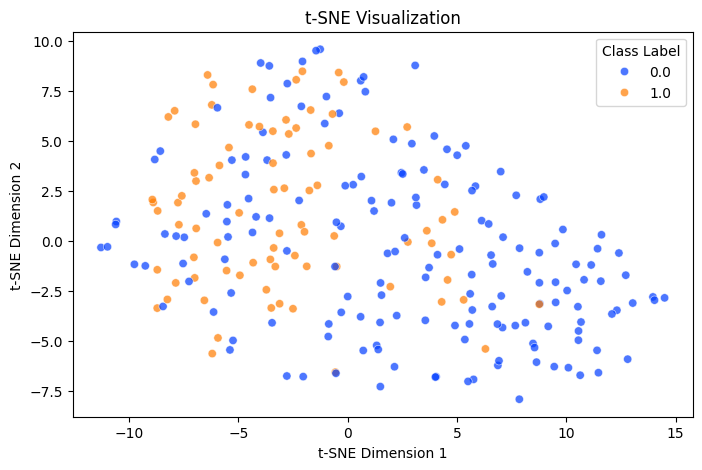

In [ ]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2, random_state=0,n_iter=5000,perplexity=40)
tsne_data=model.fit_transform(X_train)
tsne_data=np.vstack((tsne_data.T,y_train)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label",palette="bright", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Label")
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [ ]:
custom_f1_scorer = make_scorer(f1_score, pos_label=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression(random_state=42,class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Optimization algorithm
   'max_iter': [100, 200, 500],  # Maximum iterations
    'fit_intercept': [True, False],  # Include or exclude intercept
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class strategy
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1 , scoring=custom_f1_scorer)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3450 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [ ]:
# Use the best estimator found by GridSearchCV for predictions
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)

# Fit PCA on training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-103-edcb1e8ec83f>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


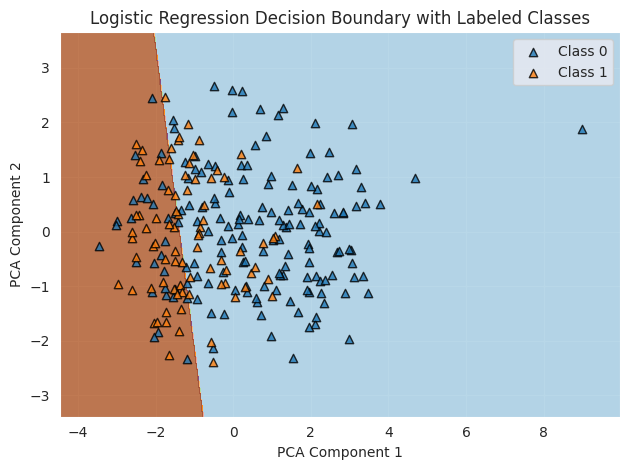

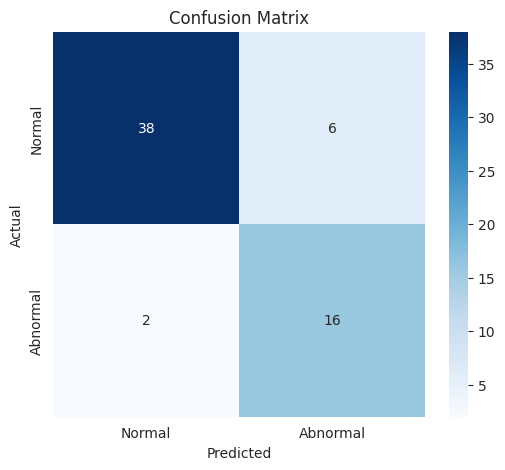

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.73      0.89      0.80        18

    accuracy                           0.87        62
   macro avg       0.84      0.88      0.85        62
weighted avg       0.89      0.87      0.87        62



In [ ]:

# Define grid step size
h = 0.02

# Define min and max for PCA-transformed features
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train SVC model with best parameters from GridSearchCV
clf_rbf = LogisticRegression(**grid_search.best_params_)
clf_rbf.fit(X_train_pca, y_train)

# Predict for each point in the mesh grid
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for training data with class labels 0 and 1
for label in np.unique(y_train):  # Loop through unique labels (0 and 1)
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=f"Class {label}",  # Add legend label
        edgecolors='k',
        marker='^',  # Changed marker to '^' (triangle) as in your second example
        alpha=0.8,
        cmap=plt.cm.RdYlBu
    )

# Set plot limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add legend and labels
plt.legend(loc="upper right")
plt.title("Logistic Regression Decision Boundary with Labeled Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Optimize layout and display plot
plt.tight_layout()
plt.show()


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


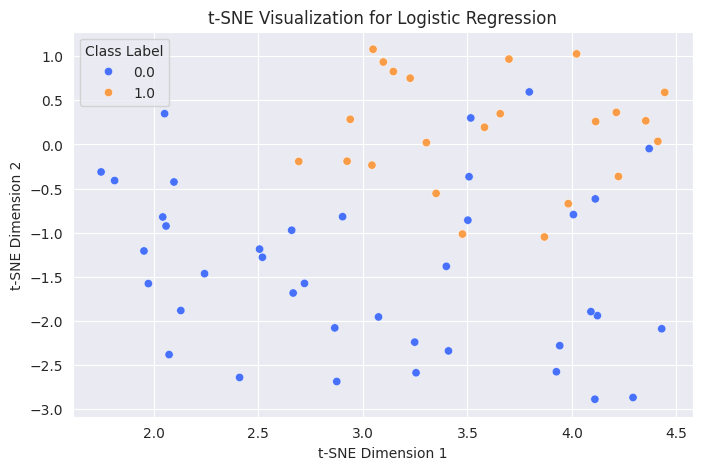

In [ ]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2, random_state=0,n_iter=5000,perplexity=40)
tsne_data=model.fit_transform(X_test)
tsne_data=np.vstack((tsne_data.T,y_pred)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label",palette="bright", alpha=0.7)
plt.title("t-SNE Visualization for Logistic Regression")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Label")
plt.show()

#### SVM

Training SVM with linear kernel...


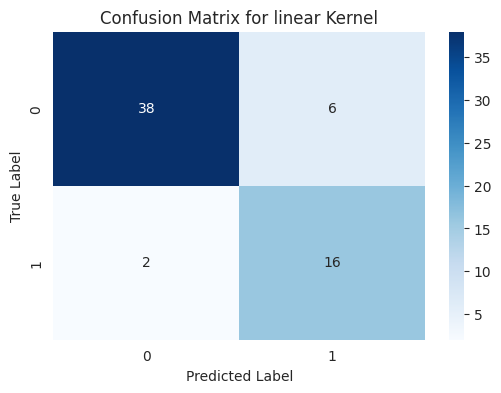

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.73      0.89      0.80        18

    accuracy                           0.87        62
   macro avg       0.84      0.88      0.85        62
weighted avg       0.89      0.87      0.87        62



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


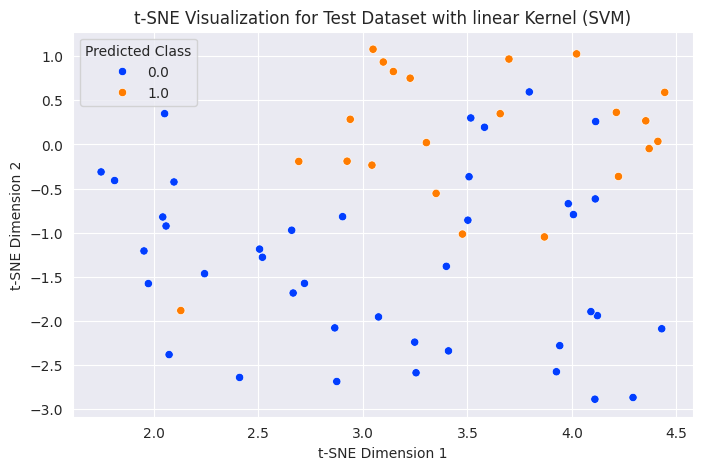

Training SVM with poly kernel...


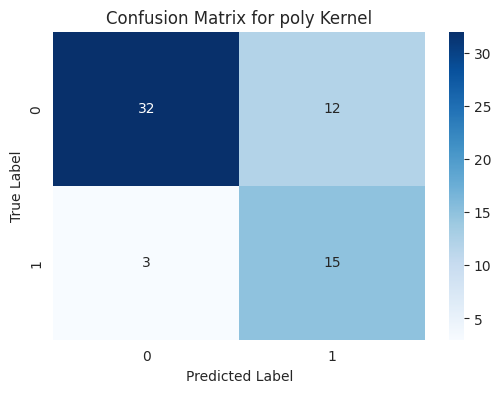

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.56      0.83      0.67        18

    accuracy                           0.76        62
   macro avg       0.73      0.78      0.74        62
weighted avg       0.81      0.76      0.77        62



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


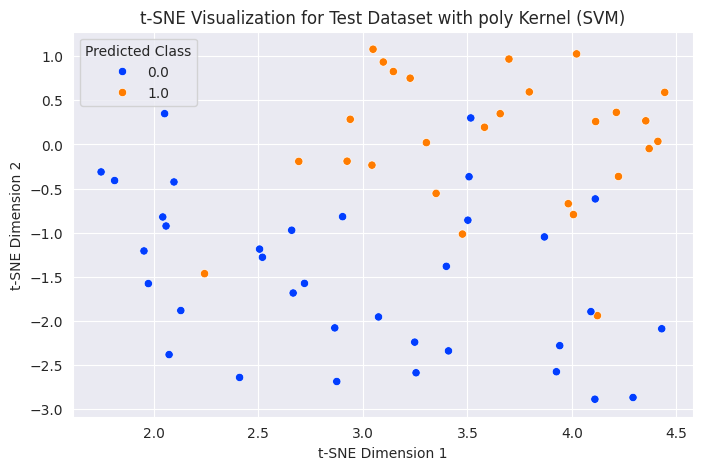

Training SVM with rbf kernel...


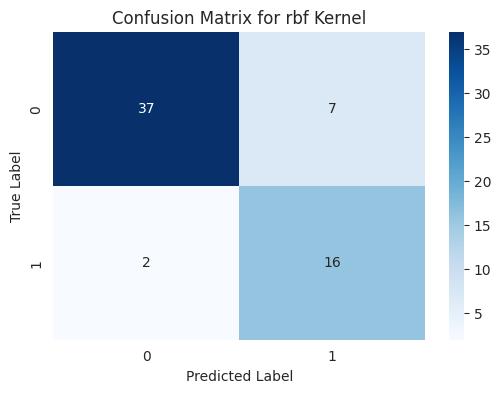

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.70      0.89      0.78        18

    accuracy                           0.85        62
   macro avg       0.82      0.86      0.84        62
weighted avg       0.88      0.85      0.86        62



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


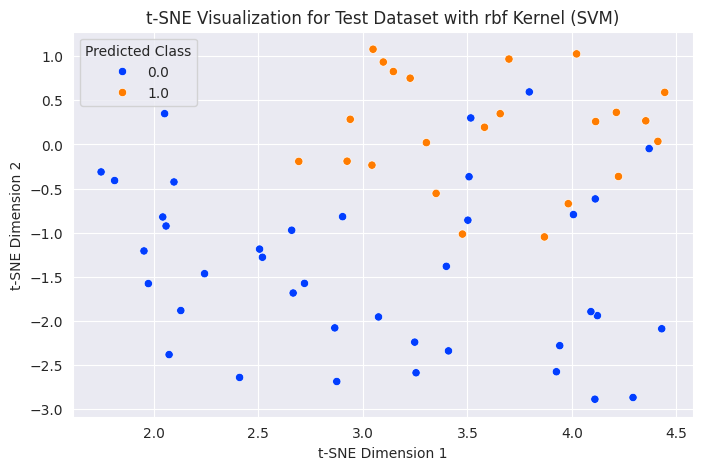

In [ ]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']


for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")


    svm_model = SVC(kernel=kernel, random_state=42,class_weight='balanced')
    svm_model.fit(X_train, y_train)


    y_pred = svm_model.predict(X_test)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(classification_report(y_test, y_pred))
    # Step 6: Apply t-SNE to reduce the feature space to 2D
    tsne_model = TSNE(n_components=2, random_state=42,n_iter=5000,perplexity=40)
    tsne_data = tsne_model.fit_transform(X_test)
    tsne_data_combined = np.vstack((tsne_data.T, y_pred)).T
    tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label", palette="bright", alpha=1)

    plt.title(f"t-SNE Visualization for Test Dataset with {kernel} Kernel (SVM)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Predicted Class")
    plt.show()


#### Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [3, 4, 5],  # Degree for polynomial kernel (only relevant for 'poly')
    'tol': [1e-3, 1e-4],  # Tolerance for stopping criterion
}


# Create an SVC model
svc_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc_model,param_grid=param_grid, cv=5, verbose=1, n_jobs=-1 , scoring=custom_f1_scorer)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best Parameters Found: ", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_svc_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_svc_model.predict(X_test)

# Evaluate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters: ", accuracy)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters Found:  {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.001}
Test Accuracy with Best Parameters:  0.8225806451612904


<ipython-input-43-ad74c6fef389>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


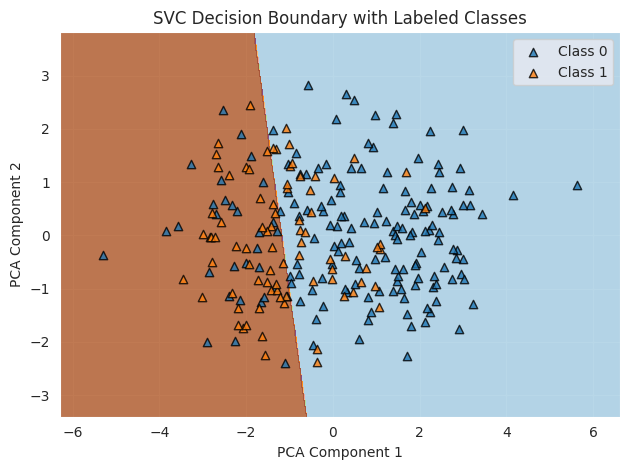

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define grid step size
h = 0.02

# Define min and max for PCA-transformed features
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train SVC model with best parameters from GridSearchCV
clf_rbf = SVC(**grid_search.best_params_)
clf_rbf.fit(X_train_pca, y_train)

# Predict for each point in the mesh grid
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for training data with class labels 0 and 1
for label in np.unique(y_train):  # Loop through unique labels (0 and 1)
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=f"Class {label}",  # Add legend label
        edgecolors='k',
        marker='^',  # Changed marker to '^' (triangle) as in your second example
        alpha=0.8,
        cmap=plt.cm.RdYlBu
    )

# Set plot limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add legend and labels
plt.legend(loc="upper right")
plt.title("SVC Decision Boundary with Labeled Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Optimize layout and display plot
plt.tight_layout()
plt.show()


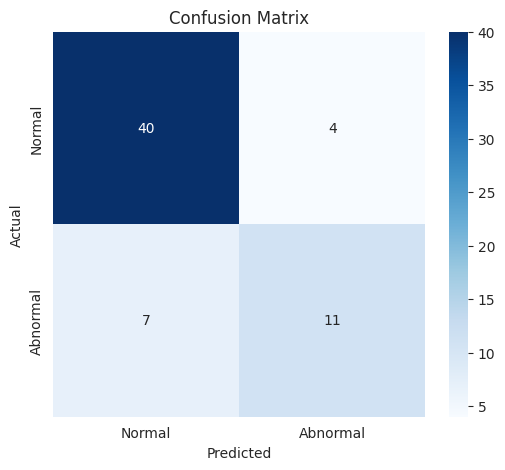

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


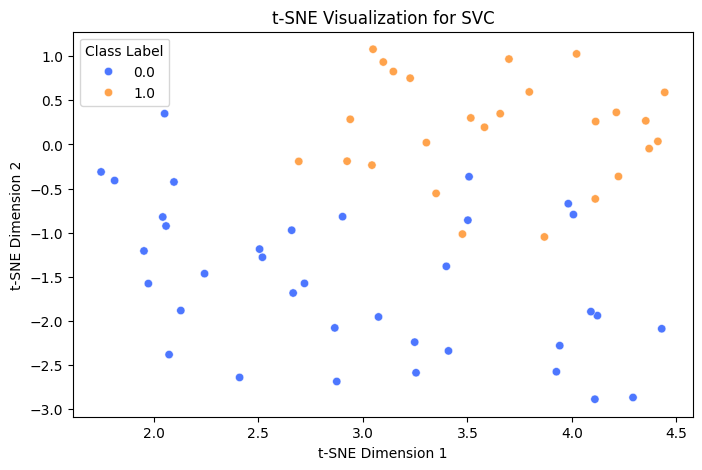

In [ ]:
c

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model=DecisionTreeClassifier(random_state=42)
# Define hyperparameter grid
param_grid = {

    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],  # Splitting criterion
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1 , scoring=custom_f1_scorer)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_tree_model = grid_search.best_estimator_

# Fit the best model and make predictions
y_pred = best_tree_model.predict(X_test)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<ipython-input-62-e1df36d77fd7>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


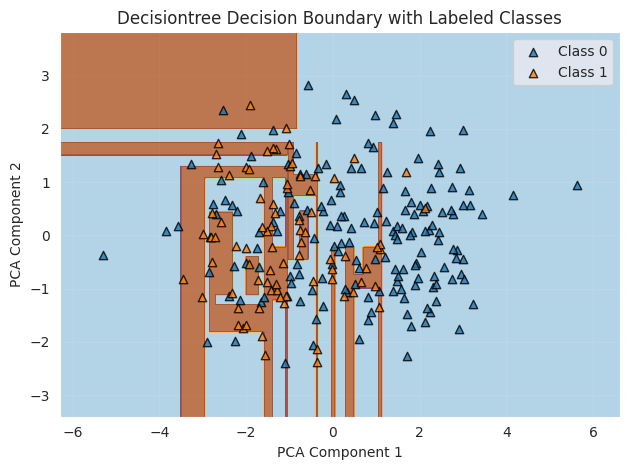

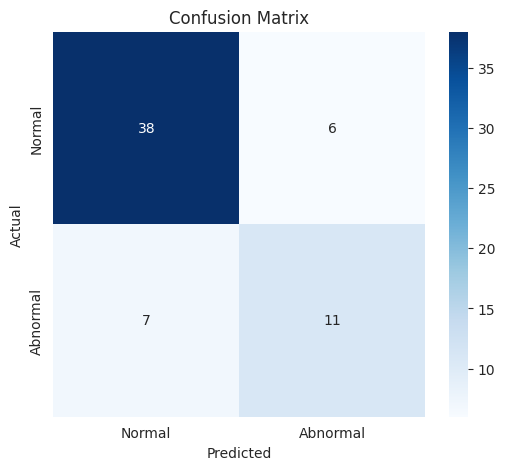

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.65      0.61      0.63        18

    accuracy                           0.79        62
   macro avg       0.75      0.74      0.74        62
weighted avg       0.79      0.79      0.79        62



In [ ]:
# Create a mesh grid for the decision boundary
h = 0.02  # Step size in the mesh grid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define grid step size
h = 0.02

# Define min and max for PCA-transformed features
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train SVC model with best parameters from GridSearchCV
clf_rbf = DecisionTreeClassifier(**grid_search.best_params_)
clf_rbf.fit(X_train_pca, y_train)

# Predict for each point in the mesh grid
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for training data with class labels 0 and 1
for label in np.unique(y_train):  # Loop through unique labels (0 and 1)
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=f"Class {label}",  # Add legend label
        edgecolors='k',
        marker='^',  # Changed marker to '^' (triangle) as in your second example
        alpha=0.8,
        cmap=plt.cm.RdYlBu
    )

# Set plot limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add legend and labels
plt.legend(loc="upper right")
plt.title("Decisiontree Decision Boundary with Labeled Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Optimize layout and display plot
plt.tight_layout()
plt.show()


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8225806451612904


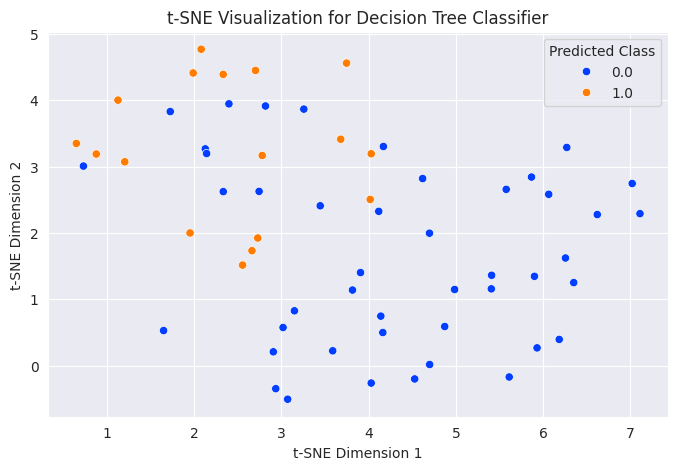

In [ ]:
print(f"Accuracy: {accuracy}")
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(X_test)
tsne_data_combined = np.vstack((tsne_data.T, y_pred)).T
tsne_df = pd.DataFrame(data=tsne_data_combined, columns=("Dim_1", "Dim_2", "label"))
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label", palette="bright", alpha=1)

plt.title(f"t-SNE Visualization for Decision Tree Classifier")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Predicted Class")
plt.show()

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import f1_score , make_scorer

In [ ]:
rf_model= RandomForestClassifier(random_state=42)

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='accuracy', cv=5 )

In [ ]:
grid_random_forest=grid_search.fit(X_train , y_train)

In [ ]:
y_pred = grid_random_forest.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
tree_model=RandomForestClassifier(**grid_search.best_params_)
# Define hyperparameter grid

<ipython-input-138-a40be7c17114>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


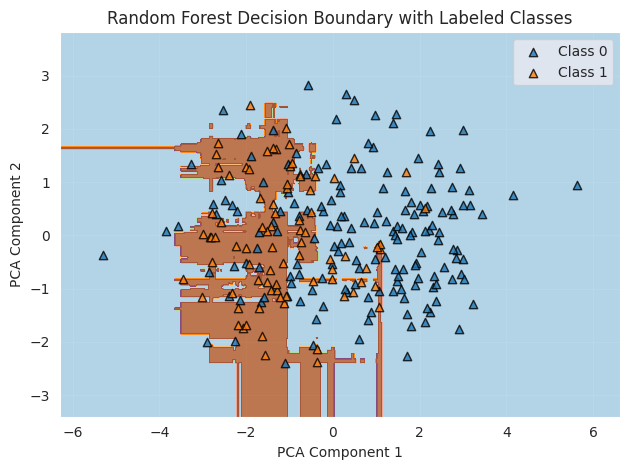

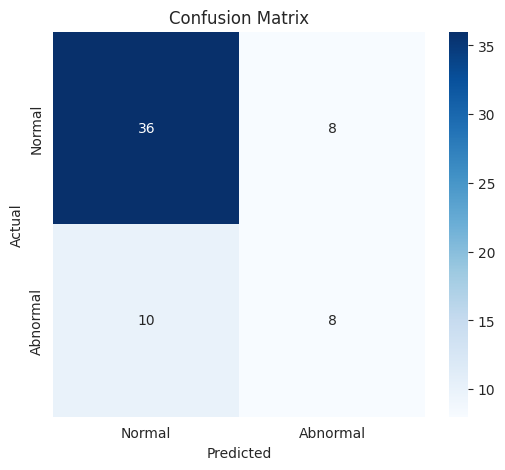

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        44
           1       0.50      0.44      0.47        18

    accuracy                           0.71        62
   macro avg       0.64      0.63      0.64        62
weighted avg       0.70      0.71      0.70        62



In [ ]:
# Create a mesh grid for the decision boundary

# Define grid step size
h = 0.02

# Define min and max for PCA-transformed features
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train SVC model with best parameters from GridSearchCV
clf_rbf = RandomForestClassifier(**grid_search.best_params_)
clf_rbf.fit(X_train_pca, y_train)

# Predict for each point in the mesh grid
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for training data with class labels 0 and 1
for label in np.unique(y_train):  # Loop through unique labels (0 and 1)
    plt.scatter(
        X_train_pca[y_train == label, 0],
        X_train_pca[y_train == label, 1],
        label=f"Class {label}",  # Add legend label
        edgecolors='k',
        marker='^',  # Changed marker to '^' (triangle) as in your second example
        alpha=0.8,
        cmap=plt.cm.RdYlBu
    )

# Set plot limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add legend and labels
plt.legend(loc="upper right")
plt.title("Random Forest Decision Boundary with Labeled Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Optimize layout and display plot
plt.tight_layout()
plt.show()


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

### Feature Importance

#### Decision Tree

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

pelvic_incidence: 0.04438
pelvic_tilt: 0.02422
lumbar_lordosis_angle: 0.03416
sacral_slope: 0.11970
pelvic_radius: 0.09660
degree_spondylolisthesis: 0.40136
pelvic_slope: 0.00000
direct_tilt: 0.09140
thoracic_slope: 0.10771
cervical_tilt: 0.00000
sacrum_angle: 0.05719
scoliosis_slope: 0.02328


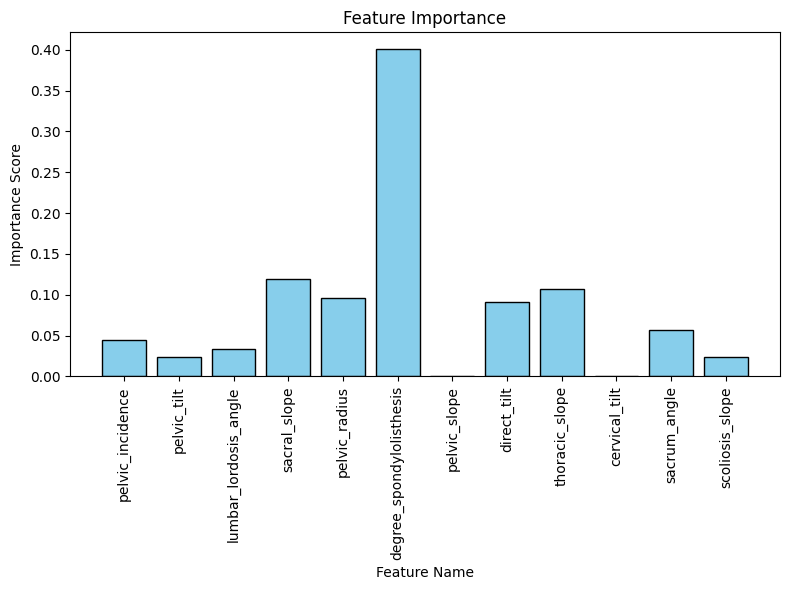

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

features = [
    "pelvic_incidence",
    "pelvic_tilt",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis",
    "pelvic_slope",
    "direct_tilt",
    "thoracic_slope",
    "cervical_tilt",
    "sacrum_angle",
    "scoliosis_slope",
]

# Get the feature importances
forest_importance = model.feature_importances_

# Create a pandas series with feature names as the index
forest_importances = pd.Series(forest_importance, index=features)

# Reorder the series according to the order of the features list
forest_importances = forest_importances[features]


for feature, score in zip(forest_importances.index, forest_importances):
    print(f'{feature}: {score:.5f}')


plt.figure(figsize=(8, 6))
plt.bar(range(len(forest_importances)), forest_importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.xticks(ticks=np.arange(len(forest_importances)), labels=forest_importances.index, rotation=90)
plt.tight_layout()
plt.show()


#### Random Forest

pelvic_incidence: 0.04438
pelvic_tilt: 0.02422
lumbar_lordosis_angle: 0.03416
sacral_slope: 0.11970
pelvic_radius: 0.09660
degree_spondylolisthesis: 0.40136
pelvic_slope: 0.00000
direct_tilt: 0.09140
thoracic_slope: 0.10771
cervical_tilt: 0.00000
sacrum_angle: 0.05719
scoliosis_slope: 0.02328


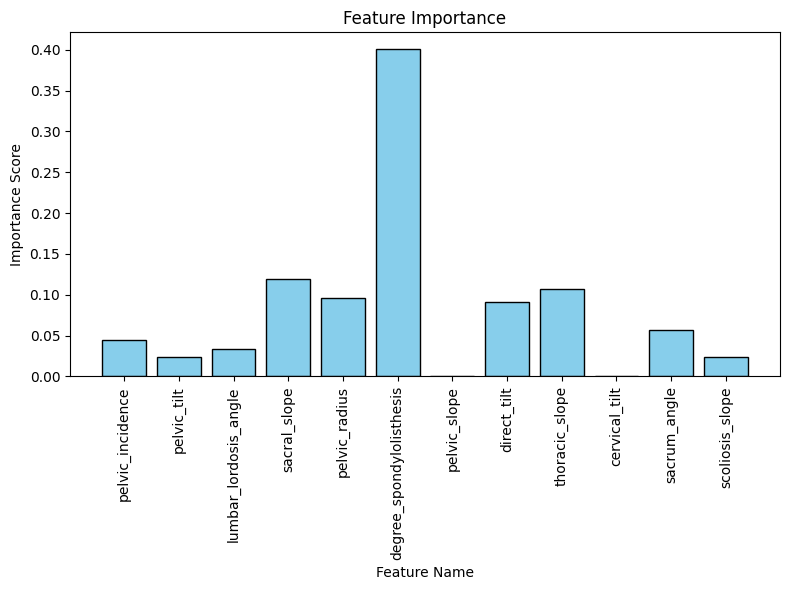

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

features = [
    "pelvic_incidence",
    "pelvic_tilt",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis",
    "pelvic_slope",
    "direct_tilt",
    "thoracic_slope",
    "cervical_tilt",
    "sacrum_angle",
    "scoliosis_slope",
]


rf_importance = model.feature_importances_


rf_importances = pd.Series(rf_importance, index=list(features))

forest_importances = forest_importances[features]


for feature, score in zip(rf_importances.index, rf_importances):
    print(f'{feature}: {score:.5f}')

plt.figure(figsize=(8, 6))
plt.bar(range(len(rf_importances)), rf_importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.xticks(ticks=np.arange(len(rf_importances)), labels=rf_importances.index, rotation=90)
plt.tight_layout()
plt.show()

#### PCA

Explained Variance Ratio (for each Principal Component):
PC1: 0.27578
PC2: 0.10030
PC3: 0.09684
PC4: 0.09357
PC5: 0.08471
PC6: 0.07911
PC7: 0.07419
PC8: 0.07101
PC9: 0.06161
PC10: 0.04136
PC11: 0.02151
PC12: 0.00000


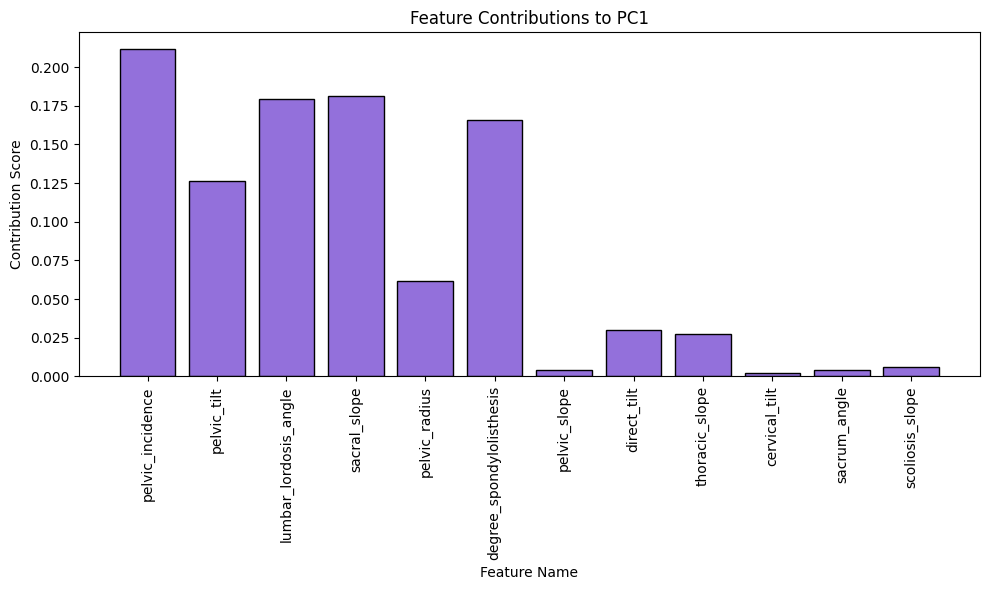

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


pca = PCA(n_components=min(X.shape))
pca.fit(X_train)


explained_variance_ratio = pca.explained_variance_ratio_


feature_contribution = np.abs(pca.components_)
feature_contribution = feature_contribution / feature_contribution.sum(axis=1)[:, np.newaxis]


features = [
    "pelvic_incidence",
    "pelvic_tilt",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis",
    "pelvic_slope",
    "direct_tilt",
    "thoracic_slope",
    "cervical_tilt",
    "sacrum_angle",
    "scoliosis_slope",
]


print("Explained Variance Ratio (for each Principal Component):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f'PC{i+1}: {ratio:.5f}')

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_contribution[0], color='mediumpurple', edgecolor='black')
plt.title("Feature Contributions to PC1")
plt.xlabel("Feature Name")
plt.ylabel("Contribution Score")
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation=90)
plt.tight_layout()
plt.show()


#### t-SNE plot for top features from Decision Forest and Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


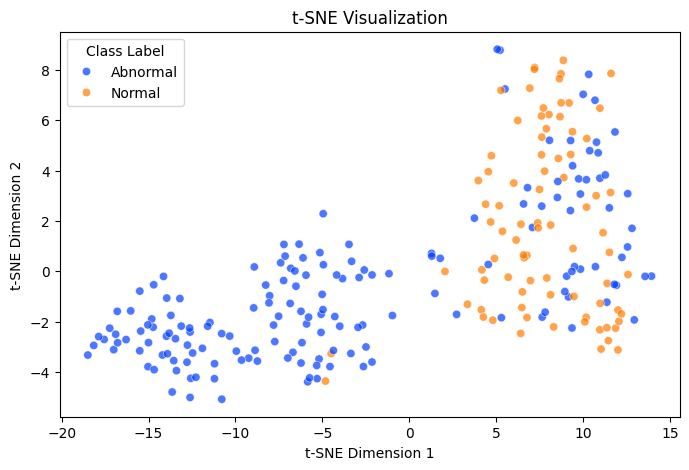

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

selected_features = ['direct_tilt', 'thoracic_slope', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
X = df[selected_features]
y = df['outcome']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply t-SNE
model = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=40)
tsne_data = model.fit_transform(X_train)

# Combine t-SNE output with the labels
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Visualize t-SNE results
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label", palette="bright", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Label")
plt.show()

### SVM After Feature Importance From Decision Tree & Random Forest

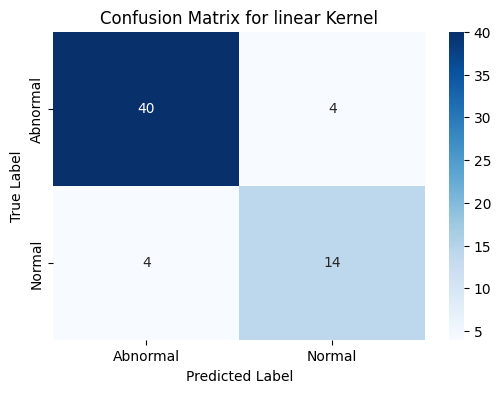

              precision    recall  f1-score   support

    Abnormal       0.91      0.91      0.91        44
      Normal       0.78      0.78      0.78        18

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



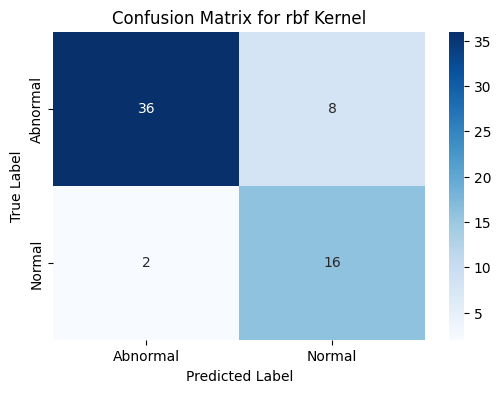

              precision    recall  f1-score   support

    Abnormal       0.95      0.82      0.88        44
      Normal       0.67      0.89      0.76        18

    accuracy                           0.84        62
   macro avg       0.81      0.85      0.82        62
weighted avg       0.87      0.84      0.84        62



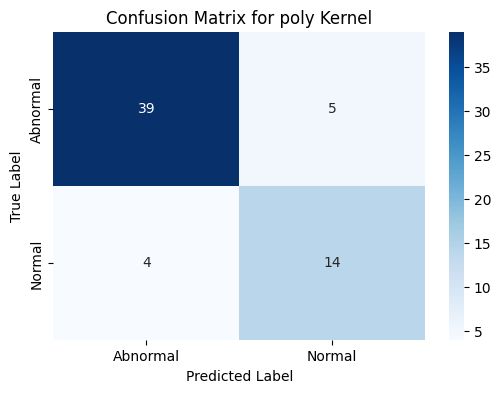

              precision    recall  f1-score   support

    Abnormal       0.91      0.89      0.90        44
      Normal       0.74      0.78      0.76        18

    accuracy                           0.85        62
   macro avg       0.82      0.83      0.83        62
weighted avg       0.86      0.85      0.86        62



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

selected_features = ['direct_tilt', 'thoracic_slope', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
df_filtered = df[selected_features + ['outcome']]



X = df_filtered[selected_features]
y = df_filtered['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM kernels
kernels = ["linear", "rbf", "poly"]

for kernel in kernels:

    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)

    # Predict on test data
    y_pred = svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(classification_report(y_test, y_pred))


#### t-SNE plot for top features from PCA

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


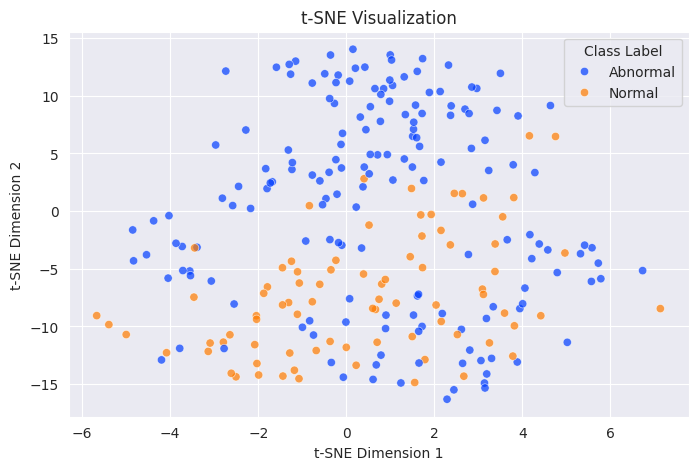

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

selected_features = [ 'pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 'degree_spondylolisthesis']
X = df[selected_features]
y = df['outcome']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply t-SNE
model = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=40)
tsne_data = model.fit_transform(X_train)

# Combine t-SNE output with the labels
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Visualize t-SNE results
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label", palette="bright", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class Label")
plt.show()

### SVM from PCA Interpretation

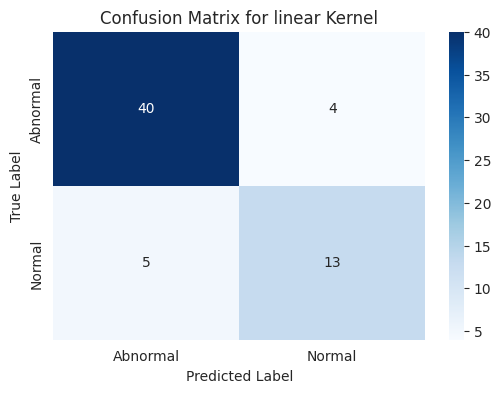

              precision    recall  f1-score   support

    Abnormal       0.89      0.91      0.90        44
      Normal       0.76      0.72      0.74        18

    accuracy                           0.85        62
   macro avg       0.83      0.82      0.82        62
weighted avg       0.85      0.85      0.85        62



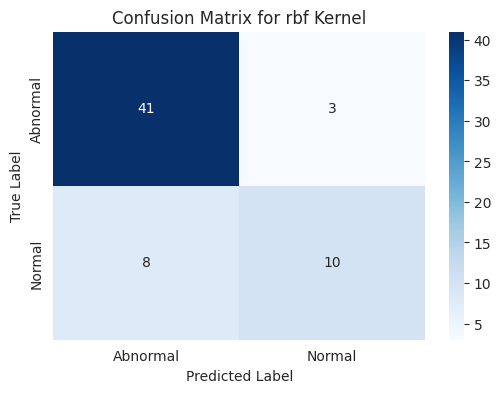

              precision    recall  f1-score   support

    Abnormal       0.84      0.93      0.88        44
      Normal       0.77      0.56      0.65        18

    accuracy                           0.82        62
   macro avg       0.80      0.74      0.76        62
weighted avg       0.82      0.82      0.81        62



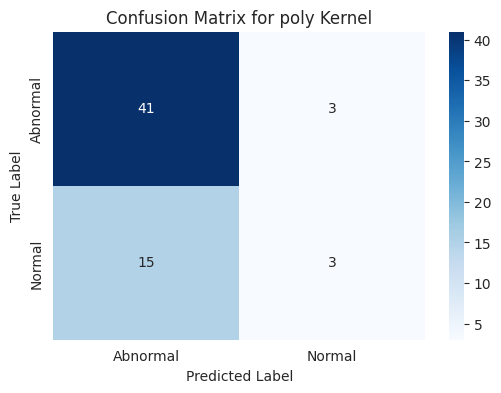

              precision    recall  f1-score   support

    Abnormal       0.73      0.93      0.82        44
      Normal       0.50      0.17      0.25        18

    accuracy                           0.71        62
   macro avg       0.62      0.55      0.53        62
weighted avg       0.66      0.71      0.65        62



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

selected_features = [ 'pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 'degree_spondylolisthesis']
df_filtered = df[selected_features + ['outcome']]



X = df_filtered[selected_features]
y = df_filtered['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM kernels
kernels = ["linear", "rbf", "poly"]

for kernel in kernels:

    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)

    # Predict on test data
    y_pred = svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(classification_report(y_test, y_pred))


### LDA

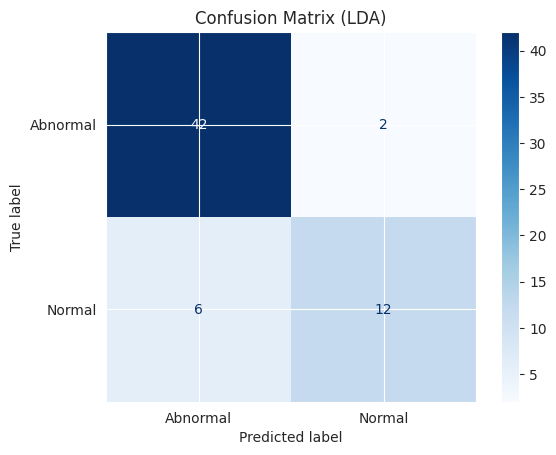

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.88      0.95      0.91        44
      Normal       0.86      0.67      0.75        18

    accuracy                           0.87        62
   macro avg       0.87      0.81      0.83        62
weighted avg       0.87      0.87      0.87        62



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Example data (you can replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset
# X = df.drop(columns=['outcome'])  # Features
# y = df['outcome']  # Target variable

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Predict using the test set
y_pred_lda = lda.predict(X_test)

# Check class labels mapping (normal=0, abnormal=1)
class_labels = dict(enumerate(pd.factorize(df['outcome'])[1]))

# Calculate confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Display the confusion matrix with correct labels
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda,
                                  display_labels=[class_labels[0], class_labels[1]])
disp_lda.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (LDA)')
plt.show()

# Calculate and print additional performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lda, target_names=[class_labels[0], class_labels[1]]))


                     Feature  Importance Score
0           pelvic_incidence          3.429323
3               sacral_slope          3.370640
5   degree_spondylolisthesis          1.842943
1                pelvic_tilt          1.395975
6               pelvic_slope          0.677428
4              pelvic_radius          0.079757
9              cervical_tilt          0.067356
2      lumbar_lordosis_angle          0.042798
7                direct_tilt          0.018195
11           scoliosis_slope          0.012016
8             thoracic_slope          0.005301
10              sacrum_angle          0.002566


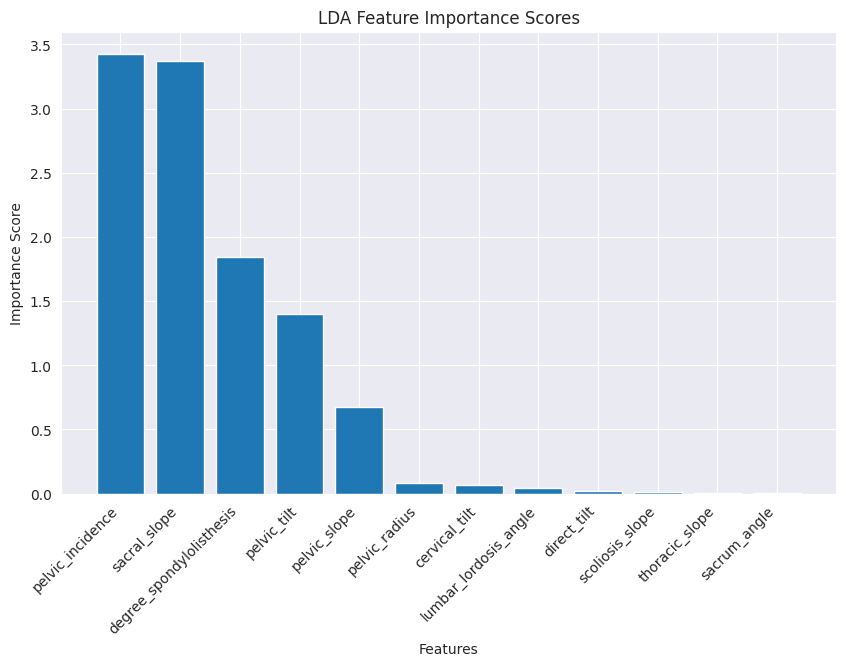

Top 5 Features Selected from LDA Importance Scores:
['pelvic_incidence' 'sacral_slope' 'degree_spondylolisthesis'
 'pelvic_tilt' 'pelvic_slope']
--------------------------------------------------


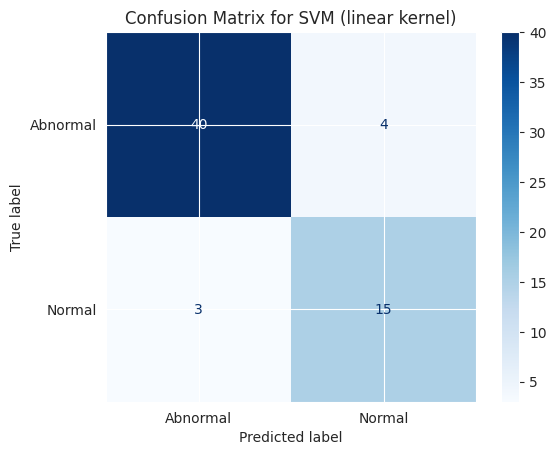

SVM with linear kernel:
Accuracy: 0.8871
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.79      0.83      0.81        18

    accuracy                           0.89        62
   macro avg       0.86      0.87      0.87        62
weighted avg       0.89      0.89      0.89        62

--------------------------------------------------


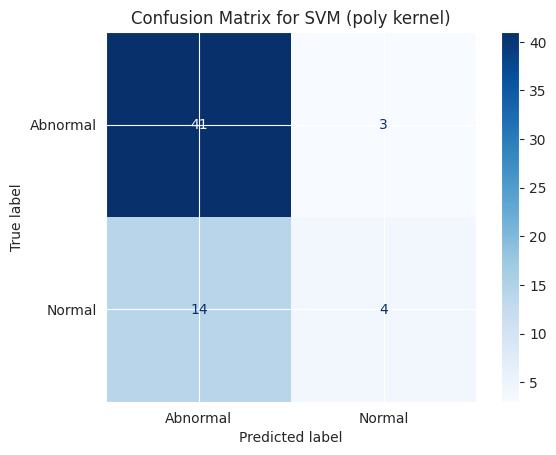

SVM with poly kernel:
Accuracy: 0.7258
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        44
           1       0.57      0.22      0.32        18

    accuracy                           0.73        62
   macro avg       0.66      0.58      0.57        62
weighted avg       0.69      0.73      0.68        62

--------------------------------------------------


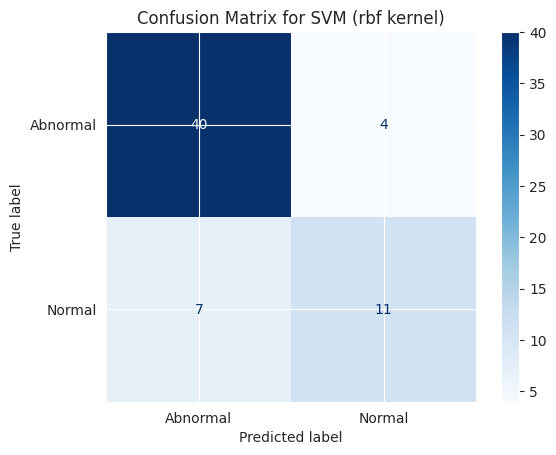

SVM with rbf kernel:
Accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.73      0.61      0.67        18

    accuracy                           0.82        62
   macro avg       0.79      0.76      0.77        62
weighted avg       0.82      0.82      0.82        62

--------------------------------------------------


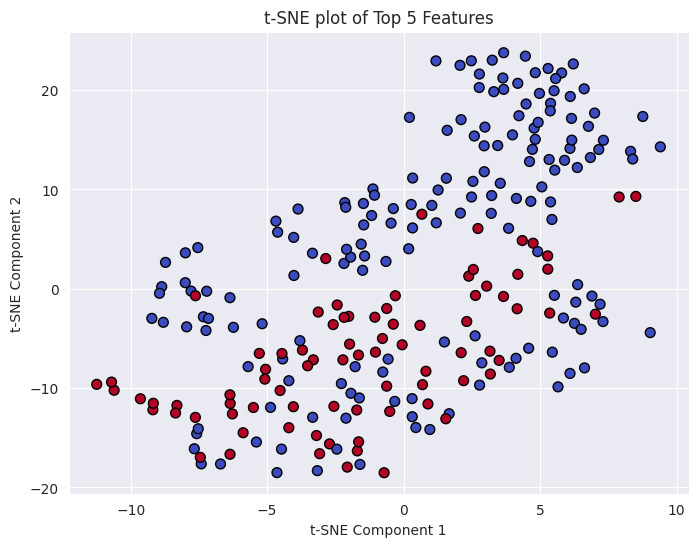

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC  # Importing the Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE  # Importing t-SNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define features and target
X = df.drop('outcome', axis=1)
y = df['outcome']

# If target is categorical, encode it
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Extract feature importance (coefficients)
coef_values = abs(lda.coef_.ravel())  # Flatten coefficients if needed

# Create a DataFrame for scores
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance Score': coef_values
}).sort_values(by='Importance Score', ascending=False)

# Display the results
print(feature_importance)

# Plot feature importance (Features on X-axis)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance Score'])
plt.xticks(rotation=45, ha='right')  # Rotate feature names for clarity
plt.title('LDA Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Optionally, select the top N features for further analysis
top_n_features = feature_importance['Feature'].head(5).values
X_train_top_n = X_train[top_n_features]
X_test_top_n = X_test[top_n_features]

# Print the top N features
print("Top 5 Features Selected from LDA Importance Scores:")
print(top_n_features)
print("-" * 50)

# Define SVM kernels
kernels = ['linear', 'poly', 'rbf']

# Apply SVM for each kernel using the top N features
for kernel in kernels:
    # Initialize and fit the model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_top_n, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test_top_n)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix with custom labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for SVM ({kernel} kernel)')
    plt.show()


    # Print evaluation results
    print(f"SVM with {kernel} kernel:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# t-SNE plot for top 5 features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_top_n)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title('t-SNE plot of Top 5 Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### PLS

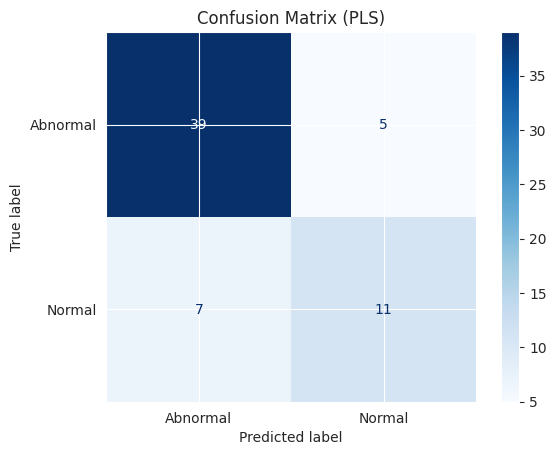

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.85      0.89      0.87        44
      Normal       0.69      0.61      0.65        18

    accuracy                           0.81        62
   macro avg       0.77      0.75      0.76        62
weighted avg       0.80      0.81      0.80        62



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Example data (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset
# X = df.drop(columns=['outcome'])  # Features
# y = df['outcome']  # Target variable

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the PLS model (using 2 components as an example)
pls = PLSRegression(n_components=2)

# Fit the PLS model on the training data
pls.fit(X_train, y_train)

# Predict using the test set
y_pred_pls = pls.predict(X_test)

# Since PLS returns continuous output, convert to binary classification (e.g., 0 or 1)
y_pred_pls_class = (y_pred_pls > 0.5).astype(int)

# Check class labels mapping (normal=0, abnormal=1)
class_labels = dict(enumerate(pd.factorize(df['outcome'])[1]))

# Calculate confusion matrix for PLS
cm_pls = confusion_matrix(y_test, y_pred_pls_class)

# Display the confusion matrix with correct labels
disp_pls = ConfusionMatrixDisplay(confusion_matrix=cm_pls,
                                  display_labels=[class_labels[0], class_labels[1]])
disp_pls.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (PLS)')
plt.show()

# Calculate and print additional performance metrics
accuracy_pls = accuracy_score(y_test, y_pred_pls_class)
print(f"Accuracy: {accuracy_pls:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pls_class, target_names=[class_labels[0], class_labels[1]]))


                     Feature  Importance Score
5   degree_spondylolisthesis          0.189268
1                pelvic_tilt          0.108783
6               pelvic_slope          0.097603
3               sacral_slope          0.064375
9              cervical_tilt          0.020082
0           pelvic_incidence          0.017314
2      lumbar_lordosis_angle          0.016719
4              pelvic_radius          0.010733
7                direct_tilt          0.003971
11           scoliosis_slope          0.001829
10              sacrum_angle          0.000480
8             thoracic_slope          0.000022


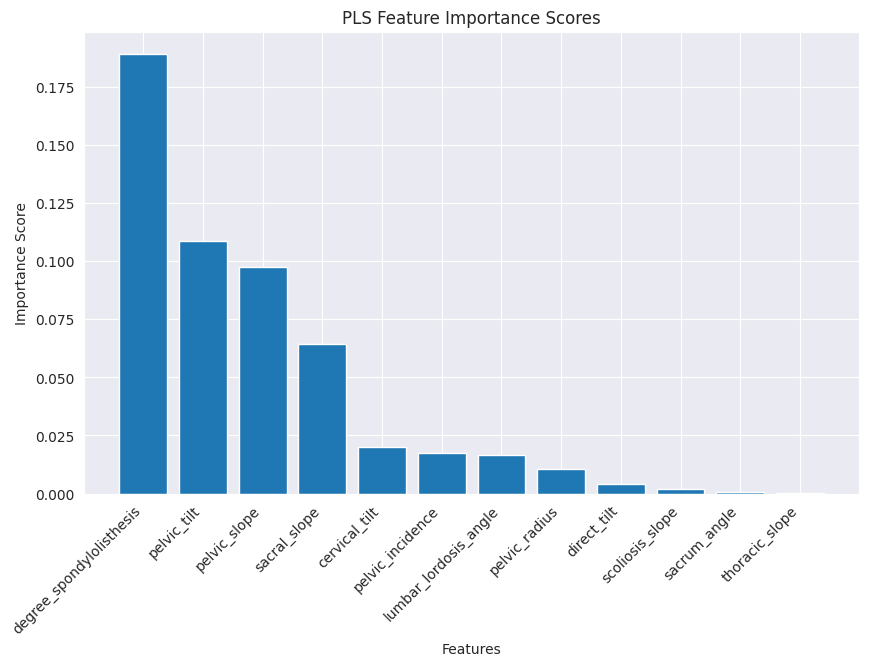

Top 5 Features Selected from PLS Importance Scores:
['degree_spondylolisthesis' 'pelvic_tilt' 'pelvic_slope' 'sacral_slope'
 'cervical_tilt']
--------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for Linear Kernel:
{'C': 100}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for Polynomial Kernel:
{'C': 1, 'degree': 2, 'gamma': 'auto'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters for RBF Kernel:
{'C': 1, 'gamma': 'auto'}

SVM with linear kernel:


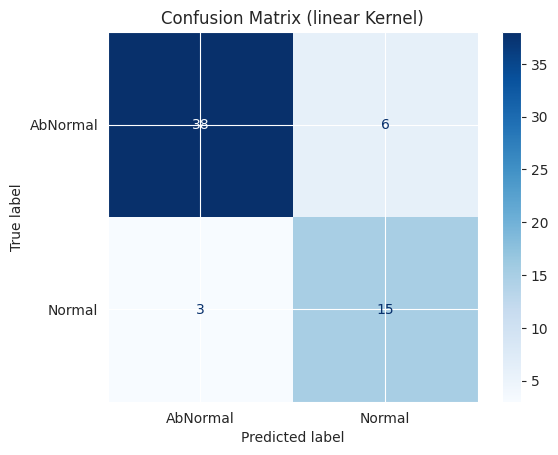

Accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.71      0.83      0.77        18

    accuracy                           0.85        62
   macro avg       0.82      0.85      0.83        62
weighted avg       0.87      0.85      0.86        62


SVM with poly kernel:


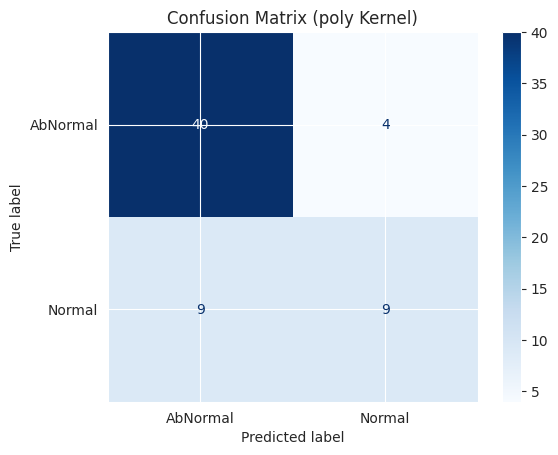

Accuracy: 0.7903
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        44
           1       0.69      0.50      0.58        18

    accuracy                           0.79        62
   macro avg       0.75      0.70      0.72        62
weighted avg       0.78      0.79      0.78        62


SVM with rbf kernel:


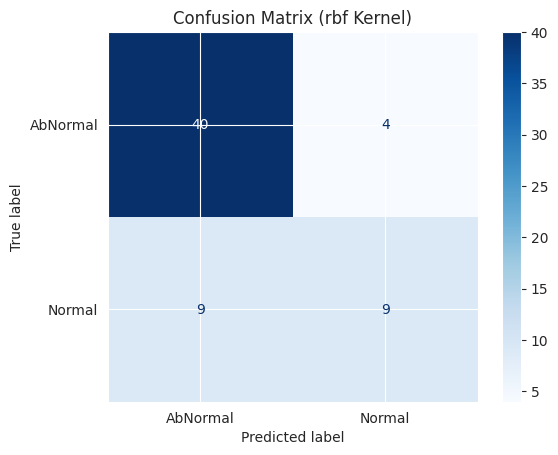

Accuracy: 0.7903
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        44
           1       0.69      0.50      0.58        18

    accuracy                           0.79        62
   macro avg       0.75      0.70      0.72        62
weighted avg       0.78      0.79      0.78        62



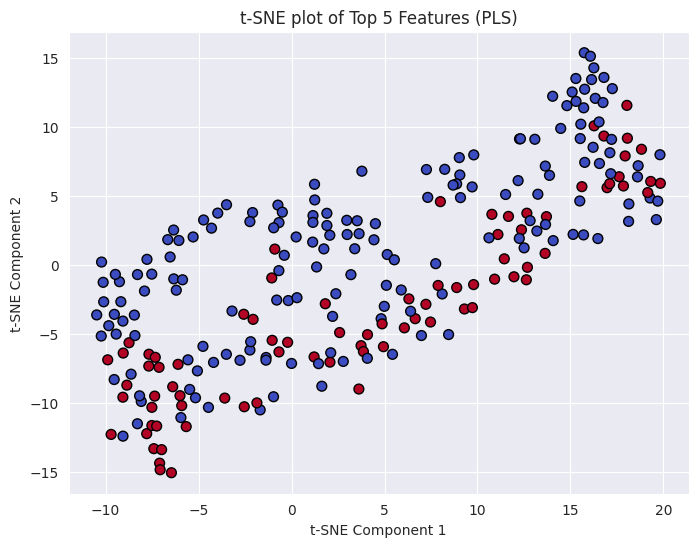

In [ ]:
if y.dtype == 'object':
    y = pd.factorize(y)[0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pls = PLSRegression(n_components=min(X_train.shape[1], 2))
pls.fit(X_train, y_train)

# Extract feature importance (coefficients from PLS)
coef_values = abs(pls.coef_.ravel())  # Flatten coefficients if needed

# Create a DataFrame for scores
feature_importance_pls = pd.DataFrame({
    'Feature': X.columns,
    'Importance Score': coef_values
}).sort_values(by='Importance Score', ascending=False)


print(feature_importance_pls)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_pls['Feature'], feature_importance_pls['Importance Score'])
plt.xticks(rotation=45, ha='right')
plt.title('PLS Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


top_n_features_pls = feature_importance_pls['Feature'].head(5).values
X_train_top_n_pls = X_train[top_n_features_pls]
X_test_top_n_pls = X_test[top_n_features_pls]


print("Top 5 Features Selected from PLS Importance Scores:")
print(top_n_features_pls)
print("-" * 50)

# Define hyperparameters for each kernel
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
}
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}


svm_model = SVC(random_state=42)


grid_search_linear = GridSearchCV(svm_model, param_grid_linear, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_linear.fit(X_train_top_n_pls, y_train)

# Best parameters for Linear Kernel
print("Best Hyperparameters for Linear Kernel:")
print(grid_search_linear.best_params_)

# Apply GridSearchCV for Polynomial Kernel
grid_search_poly = GridSearchCV(svm_model, param_grid_poly, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_poly.fit(X_train_top_n_pls, y_train)

# Best parameters for Polynomial Kernel
print("Best Hyperparameters for Polynomial Kernel:")
print(grid_search_poly.best_params_)

# Apply GridSearchCV for RBF Kernel
grid_search_rbf = GridSearchCV(svm_model, param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rbf.fit(X_train_top_n_pls, y_train)

# Best parameters for RBF Kernel
print("Best Hyperparameters for RBF Kernel:")
print(grid_search_rbf.best_params_)

# Make predictions and evaluate the model for each kernel
kernels = ['linear', 'poly', 'rbf']
best_models = [grid_search_linear.best_estimator_, grid_search_poly.best_estimator_, grid_search_rbf.best_estimator_]

for kernel, model in zip(kernels, best_models):
    print(f"\nSVM with {kernel} kernel:")
    y_pred = model.predict(X_test_top_n_pls)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AbNormal', 'Normal'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix ({kernel} Kernel)')
    plt.show()
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


# t-SNE plot for top 5 features
tsne = TSNE(n_components=2, random_state=42)
X_tsne_pls = tsne.fit_transform(X_train_top_n_pls)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pls[:, 0], X_tsne_pls[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title('t-SNE plot of Top 5 Features (PLS)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
